# **Convolutional Neural Networks Project: Street View Housing Number Digit Recognition**

--------------
## **Context** 
--------------
The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents. 

----------------
## **Objective**
----------------

To build a CNN model that can recognize the digits in the images.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time.

## **Importing the necessary libraries**

In [26]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU

from tensorflow.keras.losses import categorical_crossentropy

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import to_categorical

**Let us check the version of tensorflow.**

In [27]:
print(tf.__version__)

2.9.1


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [28]:
import h5py

# Open the file as read only
# User can make changes in the path as required

h5f = h5py.File('C:/Users/fehri/Documents/MIT/SVHN_single_grey1.h5', 'r')

# Load the the train and the test dataset

X_train = h5f['X_train'][:]

y_train = h5f['y_train'][:]

X_test = h5f['X_test'][:]

y_test = h5f['y_test'][:]


# Close this file

h5f.close()

Let's check the number of images in the training and the testing dataset.

In [29]:
len(X_train), len(X_test)

(42000, 18000)

**Observation:**
- There are 42,000 images in the training data and 18,000 images in the testing data. 

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

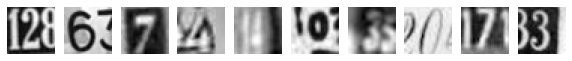

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [30]:
# Visualizing the first 10 images in the dataset and printing their labels

%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(figsize = (10, 1))

for i in range(10):

    plt.subplot(1, 10, i+1)
    
    plt.imshow(X_train[i], cmap = "gray")  # Write the function to visualize images

    plt.axis('off')

plt.show()

print('label for each of the above image: %s' % (y_train[0:10]))

## **Data preparation**


In [31]:
# Shape and the array of pixels for the first image

print("Shape:", X_train[0].shape)

print()

print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [32]:
# Reshaping the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)

X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

In [33]:
# Normalize inputs from 0-255 to 0-1

X_train = X_train / 255.0

X_test = X_test / 255.0

In [34]:
# New shape 

print('Training set:', X_train.shape, y_train.shape)

print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 32, 32, 1) (42000,)
Test set: (18000, 32, 32, 1) (18000,)


### One-hot encoding the labels in the target variable y_train and y_test. 

In [35]:
# Write the function and appropriate variable name to one-hot encode the output

y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

# test labels

y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.

In [37]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### Building and training a CNN model 

In [39]:
# Define the model

def cnn_model_1():

    model = Sequential() 
    
    # Add layers as per the architecture mentioned above in the same sequence

    model.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", input_shape = (32, 32, 1)))

    model.add(LeakyReLU(0.1))

    model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))
    
    model.add(LeakyReLU(0.1))

    model.add(MaxPool2D(pool_size = (2, 2)))

    model.add(Flatten())

    model.add(Dense(32))

    model.add(LeakyReLU(0.1))

    model.add(Dense(10, activation = 'softmax'))
    
    # Compile the model

    model.compile(
    
    loss = 'categorical_crossentropy',

    optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.001),
    
    metrics = ['accuracy']
)
    
    return model

In [40]:
# Build the model

model_1 = cnn_model_1()

In [41]:
# Print the model summary

model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 32, 32, 16)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                      

In [42]:
#Fit the model on the training data with a validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20

history_model_1 = model_1.fit(
    
            X_train, y_train,

            epochs = 20,

            validation_split = 0.2, 
            
            batch_size = 32,
            


            verbose = 1
)

Epoch 1/20
1050/1050 [==============================] - 21s 20ms/step - loss: 1.7294 - accuracy: 0.4362 - val_loss: 1.0851 - val_accuracy: 0.6781
Epoch 2/20
1050/1050 [==============================] - 20s 19ms/step - loss: 0.8442 - accuracy: 0.7576 - val_loss: 0.7185 - val_accuracy: 0.7989
Epoch 3/20
1050/1050 [==============================] - 20s 19ms/step - loss: 0.6470 - accuracy: 0.8128 - val_loss: 0.6384 - val_accuracy: 0.8171
Epoch 4/20
1050/1050 [==============================] - 20s 19ms/step - loss: 0.5685 - accuracy: 0.8369 - val_loss: 0.5757 - val_accuracy: 0.8370
Epoch 5/20
1050/1050 [==============================] - 20s 19ms/step - loss: 0.5275 - accuracy: 0.8484 - val_loss: 0.5818 - val_accuracy: 0.8383
Epoch 6/20
1050/1050 [==============================] - 21s 20ms/step - loss: 0.4917 - accuracy: 0.8591 - val_loss: 0.5673 - val_accuracy: 0.8393
Epoch 7/20
1050/1050 [==============================] - 21s 20ms/step - loss: 0.4693 - accuracy: 0.8666 - val_loss: 0.5230 -

### **Plotting the validation and training accuracies**

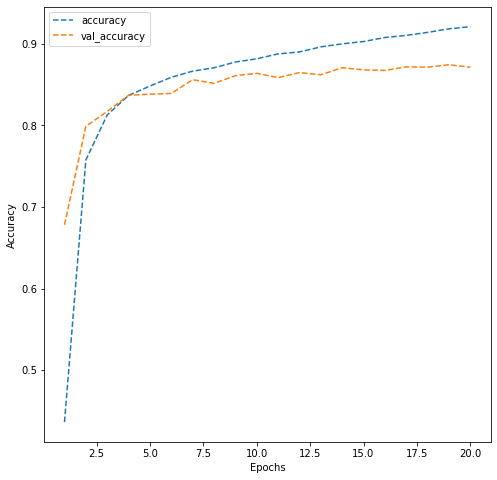

In [43]:
# Plotting the accuracies

dict_hist = history_model_1.history

list_ep = [i for i in range(1, 21)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations:**
- We can see on the plot that the model is not as good on the validation data as it is on the training data, so the model might be overfitting the training data a little. 
- The validation accuracy has become more or less constant after 5 epochs. 

Let's build another model and see if we can get a better model with generalized performance.

In [44]:
# Clearing backend

from tensorflow.keras import backend

backend.clear_session()

In [45]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Second Model Architecture**

In [46]:
# Define the model

def cnn_model_2():
    
    model = Sequential()
    
    # Add layers as per the architecture mentioned above in the same sequence

    model.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", input_shape = (32, 32, 1)))

    model.add(LeakyReLU(0.1))
    
    model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))
    
    model.add(LeakyReLU(0.1))

    model.add(MaxPool2D(pool_size = (2, 2)))
    
    model.add(BatchNormalization())
    
    model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))
    
    model.add(LeakyReLU(0.1))
    
    model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same'))
    
    model.add(LeakyReLU(0.1))
    
    model.add(MaxPool2D(pool_size = (2, 2)))
    
    model.add(BatchNormalization())

    model.add(Flatten())

    model.add(Dense(32))

    model.add(LeakyReLU(0.1))
    
    model.add(Dropout(0.5))

    model.add(Dense(10, activation = 'softmax'))
    
    
    # Compile the model

    model.compile(
    
    loss = 'categorical_crossentropy',

    optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.001),
    
    metrics = ['accuracy']
)
    
    
    return model

In [47]:
# Build the model

model_2 = cnn_model_2()

In [48]:
# Print the summary

model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                          

In [49]:
#Fit the model on the train data with a validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30.

history_model_2 = model_2.fit(
 
            X_train, y_train,

            epochs = 30,

            validation_split = 0.2, 
            
            batch_size = 128,

            verbose = 1
)

Epoch 1/30
263/263 [==============================] - 28s 105ms/step - loss: 1.8115 - accuracy: 0.3594 - val_loss: 2.9611 - val_accuracy: 0.2519
Epoch 2/30
263/263 [==============================] - 27s 101ms/step - loss: 0.9534 - accuracy: 0.6938 - val_loss: 1.1190 - val_accuracy: 0.6544
Epoch 3/30
263/263 [==============================] - 27s 102ms/step - loss: 0.7430 - accuracy: 0.7669 - val_loss: 0.5335 - val_accuracy: 0.8377
Epoch 4/30
263/263 [==============================] - 27s 101ms/step - loss: 0.6471 - accuracy: 0.7993 - val_loss: 0.4717 - val_accuracy: 0.8644
Epoch 5/30
263/263 [==============================] - 27s 101ms/step - loss: 0.5715 - accuracy: 0.8235 - val_loss: 0.4344 - val_accuracy: 0.8749
Epoch 6/30
263/263 [==============================] - 27s 104ms/step - loss: 0.5259 - accuracy: 0.8357 - val_loss: 0.4156 - val_accuracy: 0.8795
Epoch 7/30
263/263 [==============================] - 27s 103ms/step - loss: 0.4857 - accuracy: 0.8504 - val_loss: 0.3981 - val_ac

### **Plotting the validation and training accuracies**

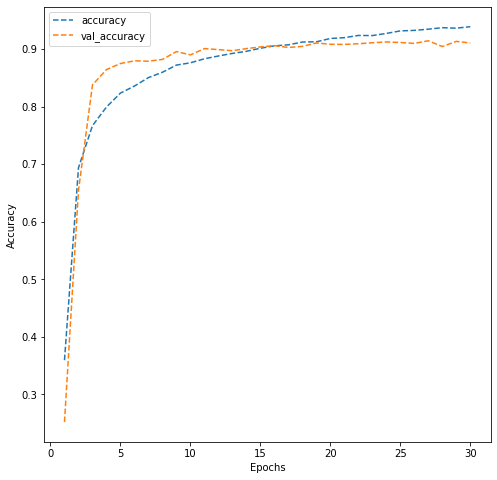

In [50]:
# Plotting the accuracies

dict_hist = history_model_2.history

list_ep = [i for i in range(1, 31)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations:**
- The accuracy for the training data and validation data are both high (0.9) and very similar. 
- The validation accuracy has become more or less constant after 5 epochs
- This model seems to have reduced the overfitting as compared to the previous model

## **Predictions on the test data**


In [51]:
# Make prediction on the test data using model_2 

test_pred = model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis = -1)

563/563 [==============================] - 5s 8ms/step


In [52]:
# Converting each entry to single label from one-hot encoded vector

y_test = np.argmax(y_test, axis = -1)

### Final observations on the performance of the model on the test data. 

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1814
           1       0.93      0.90      0.91      1828
           2       0.94      0.91      0.92      1803
           3       0.92      0.86      0.89      1719
           4       0.91      0.93      0.92      1812
           5       0.89      0.92      0.90      1768
           6       0.87      0.91      0.89      1832
           7       0.94      0.93      0.94      1808
           8       0.92      0.87      0.89      1812
           9       0.89      0.90      0.90      1804

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000



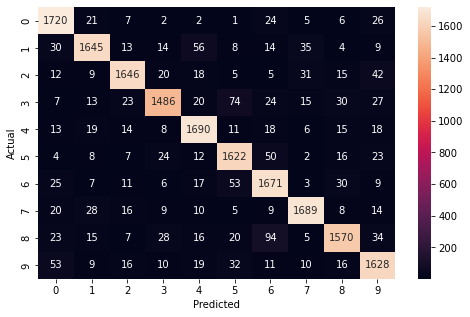

In [53]:
# Importing required functions

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report

print(classification_report(y_test, test_pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_test, test_pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

**Final Observations:**
- The precision, recall and F1 score are all high ~ 90%, which means that this model has a good overall performance. The model has a ~90% accuracy which is comparable to the validation accuracy. 
- The precision and recall both have a small range, which means that the model performs slightly better with cretain digits compared to other, but the difference is not big. 
- the performance of the model is better with CNN than with ANN. 